In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
dtype = {
    'ResponseID': 'category',
    'UserID': 'int8',
    'Intervention': 'int8',
    'PedPed': 'int8',
    'Barrier': 'int8',
    'CrossingSignal': 'int8',
    'AttributeLevel': 'category',
    'ScenarioTypeStrict': 'category',
    'NumberOfCharacters': 'int8',
    'DiffNumberOFCharacters': 'int8',
    'Saved': 'int8',
    'Man': 'int8',
    'Woman': 'int8',
    'Pregnant': 'int8',
    'Stroller': 'int8',
    'OldMan': 'int8',
    'OldWoman': 'int8',
    'Boy': 'int8',
    'Girl': 'int8',
    'Homeless': 'int8',
    'LargeWoman': 'int8',
    'LargeMan': 'int8',
    'Criminal': 'int8',
    'MaleExecutive': 'int8',
    'FemaleExecutive': 'int8',
    'FemaleAthlete': 'int8',
    'MaleAthlete': 'int8',
    'FemaleDoctor': 'int8',
    'MaleDoctor': 'int8',
    'Dog': 'int8',
    'Cat': 'int8'
}


In [3]:
# load data

df_nw = pd.read_csv('total_nw_50_dataset.csv', dtype=dtype)

In [4]:
df_nw.shape

(2500000, 31)

In [5]:
df_nw['UserID'].value_counts()

UserID
0    1250000
1    1250000
Name: count, dtype: int64

In [6]:
# checking how many different categories are in the categorical columns
print(len(df_nw['AttributeLevel'].value_counts()))
print(len(df_nw['ScenarioTypeStrict'].value_counts()))

12
6


In [7]:
# with one hot encoding, this means that there will be 19 (!) extra columns

In [8]:
# preprocessing

# one-hot encode the AttributeLevel and ScenarioTypeStrict
df_nw = pd.get_dummies(df_nw, columns=['AttributeLevel', 'ScenarioTypeStrict'])

print(df_nw.columns)


Index(['ResponseID', 'UserID', 'Intervention', 'PedPed', 'Barrier',
       'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters',
       'Saved', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman',
       'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal',
       'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete',
       'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'AttributeLevel_Fat',
       'AttributeLevel_Female', 'AttributeLevel_Fit', 'AttributeLevel_High',
       'AttributeLevel_Hoomans', 'AttributeLevel_Less', 'AttributeLevel_Low',
       'AttributeLevel_Male', 'AttributeLevel_More', 'AttributeLevel_Old',
       'AttributeLevel_Pets', 'AttributeLevel_Young', 'ScenarioTypeStrict_Age',
       'ScenarioTypeStrict_Fitness', 'ScenarioTypeStrict_Gender',
       'ScenarioTypeStrict_Social Status', 'ScenarioTypeStrict_Species',
       'ScenarioTypeStrict_Utilitarian'],
      dtype='object')


In [9]:
print(len(df_nw.columns))

47


In [10]:
"""# Convert response_ID to a numeric sequential range
df_total_encoded['response_ID_mapped'] = df_total_encoded['ResponseID'].astype('category').cat.codes

# Optionally, drop the original response_ID column
df_total_encoded = df_total_encoded.drop('ResponseID', axis=1)
"""

"# Convert response_ID to a numeric sequential range\ndf_total_encoded['response_ID_mapped'] = df_total_encoded['ResponseID'].astype('category').cat.codes\n\n# Optionally, drop the original response_ID column\ndf_total_encoded = df_total_encoded.drop('ResponseID', axis=1)\n"

In [11]:
df_nw.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,NumberOfCharacters,DiffNumberOFCharacters,Saved,Man,...,AttributeLevel_More,AttributeLevel_Old,AttributeLevel_Pets,AttributeLevel_Young,ScenarioTypeStrict_Age,ScenarioTypeStrict_Fitness,ScenarioTypeStrict_Gender,ScenarioTypeStrict_Social Status,ScenarioTypeStrict_Species,ScenarioTypeStrict_Utilitarian
0,res_00917672,0,1,1,0,0,5,0,1,0,...,False,False,False,False,False,False,True,False,False,False
1,res_01034969,0,1,0,1,0,2,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,res_00338990,1,1,1,0,0,2,0,1,0,...,False,False,False,False,False,False,True,False,False,False
3,res_00635659,1,1,0,0,1,1,0,1,0,...,False,False,False,False,False,True,False,False,False,False
4,res_00632539,1,1,1,0,0,5,1,1,0,...,True,False,False,False,False,False,False,False,False,True


In [12]:
df_nw.duplicated().sum()

0

### Splitting

In [ ]:
# Prepare features and target variable
X = df_nw.drop(['UserID', 'ResponseID'], axis=1)   # Features
y = df_nw['UserID']                                # Target variable

In [14]:
# Split the data into train, validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.111111111111, random_state=42)

### Logistic Regression

In [16]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_val)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.59826


In [19]:
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[93955 30996]
 [69439 55610]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65    124951
           1       0.64      0.44      0.53    125049

    accuracy                           0.60    250000
   macro avg       0.61      0.60      0.59    250000
weighted avg       0.61      0.60      0.59    250000



### Logistic Regession with K-fold

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store results
conf_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split data into train and test for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test)
    
    # Generate confusion matrix and classification report
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

In [25]:
# Display results
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports[i].items():
        print(f"{label}: {metrics}")


Fold 1
Confusion Matrix:
[[188298  61826]
 [138747 111129]]

Classification Report:
0: {'precision': 0.57575562995918, 'recall': 0.7528186019734212, 'f1-score': 0.6524882660018123, 'support': 250124.0}
1: {'precision': 0.6425312942672949, 'recall': 0.4447365893483168, 'f1-score': 0.5256426326357339, 'support': 249876.0}
accuracy: 0.598854
macro avg: {'precision': 0.6091434621132374, 'recall': 0.598777595660869, 'f1-score': 0.589065449318773, 'support': 500000.0}
weighted avg: {'precision': 0.6091269017484892, 'recall': 0.598854, 'f1-score': 0.5890969070358479, 'support': 500000.0}

Fold 2
Confusion Matrix:
[[188972  61020]
 [138942 111066]]

Classification Report:
0: {'precision': 0.5762852455216917, 'recall': 0.7559121891900541, 'f1-score': 0.6539887109668354, 'support': 249992.0}
1: {'precision': 0.6454098532129284, 'recall': 0.4442497840069118, 'f1-score': 0.526261922699683, 'support': 250008.0}
accuracy: 0.600076
macro avg: {'precision': 0.61084754936731, 'recall': 0.6000809865984

In [26]:
# Calculate average accuracy
accuracies = [report['accuracy'] for report in classification_reports]
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy}")

# Caluculate average standard deviation
std_dev = np.std(accuracies)
print(f"Standard Deviation: {std_dev}")


Average Accuracy: 0.5991920000000001
Standard Deviation: 0.0005020326682597674


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the test data
y_pred = rf_model.predict(X_val)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.748068


In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[96252 28699]
 [34284 90765]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75    124951
           1       0.76      0.73      0.74    125049

    accuracy                           0.75    250000
   macro avg       0.75      0.75      0.75    250000
weighted avg       0.75      0.75      0.75    250000



### Random Forest with K-fold

In [27]:
### Random Forest with K-fold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Initialize Random Forest model
rf_model_k = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up K-Fold Cross Validation (e.g., K=5)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store results
conf_matrices_rf = []
classification_reports_rf = []

# Manually loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf_model_k.fit(X_train, y_train)
    
    # Make predictions
    y_pred_rf = rf_model_k.predict(X_test)
    
    # Store confusion matrix and classification report for each fold
    conf_matrices_rf.append(confusion_matrix(y_test, y_pred_rf))
    classification_reports_rf.append(classification_report(y_test, y_pred_rf, output_dict=True))

    print("Done processing a fold")

Done processing a fold
Done processing a fold
Done processing a fold
Done processing a fold
Done processing a fold


In [28]:
# Display results for each fold
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices_rf[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports_rf[i].items():
        print(f"{label}: {metrics}")


Fold 1
Confusion Matrix:
[[192926  57198]
 [ 68655 181221]]

Classification Report:
0: {'precision': 0.7375382768626162, 'recall': 0.7713214245734116, 'f1-score': 0.7540516508535191, 'support': 250124.0}
1: {'precision': 0.7600946233311943, 'recall': 0.7252437208855592, 'f1-score': 0.7422603139495592, 'support': 249876.0}
accuracy: 0.748294
macro avg: {'precision': 0.7488164500969052, 'recall': 0.7482825727294854, 'f1-score': 0.7481559824015391, 'support': 500000.0}
weighted avg: {'precision': 0.748810856122981, 'recall': 0.748294, 'f1-score': 0.7481589066530913, 'support': 500000.0}

Fold 2
Confusion Matrix:
[[193520  56472]
 [ 69079 180929]]

Classification Report:
0: {'precision': 0.7369411155411864, 'recall': 0.7741047713526833, 'f1-score': 0.7550659297568627, 'support': 249992.0}
1: {'precision': 0.7621240011625898, 'recall': 0.7236928418290615, 'f1-score': 0.7424114039748958, 'support': 250008.0}
accuracy: 0.748898
macro avg: {'precision': 0.7495325583518881, 'recall': 0.7488988

In [29]:
# Calculate average accuracy
accuracies_rf = [report['accuracy'] for report in classification_reports_rf]
average_accuracy_rf = np.mean(accuracies_rf)
print(f"\nAverage Accuracy RF: {average_accuracy_rf}")

# Caluculate average standard deviation
std_dev_rf = np.std(accuracies_rf)
print(f"Standard Deviation: {std_dev_rf}")


Average Accuracy RF: 0.7485636
Standard Deviation: 0.0005040053967964852


### Random Forest with random search

In [15]:
from scipy.stats import randint, uniform  # For defining distributions for random search

param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest (uniform distribution between 50 and 200)
    'max_depth': [None] + list(randint(1, 30).rvs(10)),  # Random depth values including None
    'min_samples_split': randint(2, 10),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 4)  # Minimum samples required to be at a leaf node
}

In [ ]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_search = RandomForestClassifier(random_state=42)  # Random state for reproducibility

In [17]:
# Set up K-Fold Cross Validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Set up GridSearchCV
random_search = RandomizedSearchCV(estimator=rf_model_search,
                           param_distributions=param_dist,
                           n_iter=20,          # Number of parameter settings that are sampled
                           scoring='accuracy',
                           cv=k,
                           verbose=2,
                           n_jobs=-1)          # Use all available cores

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': 27, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 95}
Best Cross-Validation Score: 0.7374919997263687


In [18]:
y_pred_rf_random = random_search.predict(X_val)

print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred_rf_random))
print(confusion_matrix(y_val, y_pred_rf_random))
print(classification_report(y_val, y_pred_rf_random))

Accuracy on Validation Set: 0.741576
[[98582 26369]
 [38237 86812]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75    124951
           1       0.77      0.69      0.73    125049

    accuracy                           0.74    250000
   macro avg       0.74      0.74      0.74    250000
weighted avg       0.74      0.74      0.74    250000



In [26]:
from sklearn.metrics import fbeta_score

print("F3 score on Validation Set:", fbeta_score(y_val, y_pred_rf_random, beta=3))


F3 score on Validation Set: 0.7008756505213052


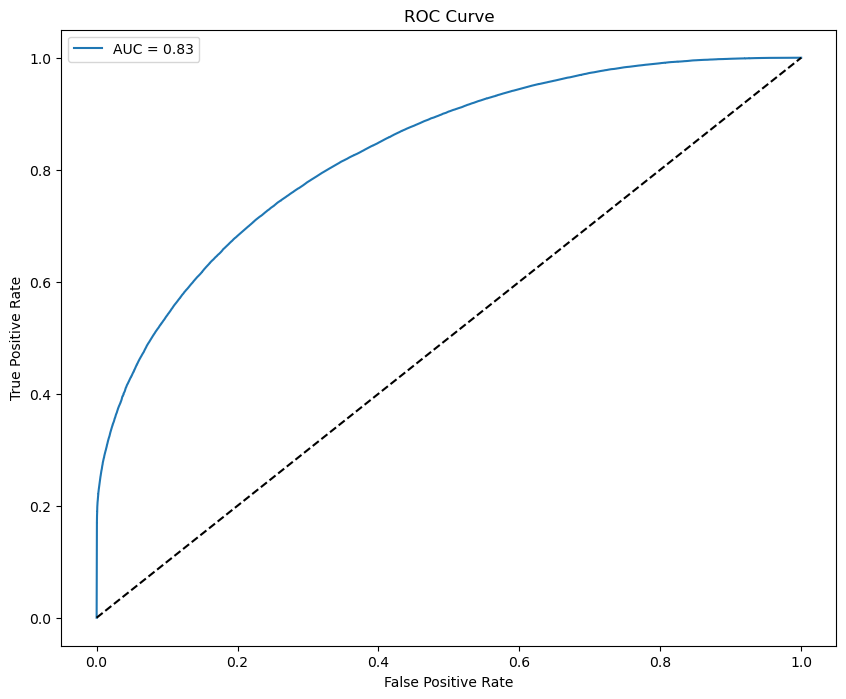

In [19]:
# plotting AUC-ROC curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities
y_pred_proba = random_search.predict_proba(X_val)

# Get the probabilities for the positive class
y_pred_proba = y_pred_proba[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Compute the AUC
auc = roc_auc_score(y_val, y_pred_proba)

# Plot the ROC curve

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### SVM

In [ ]:
"PCA"

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

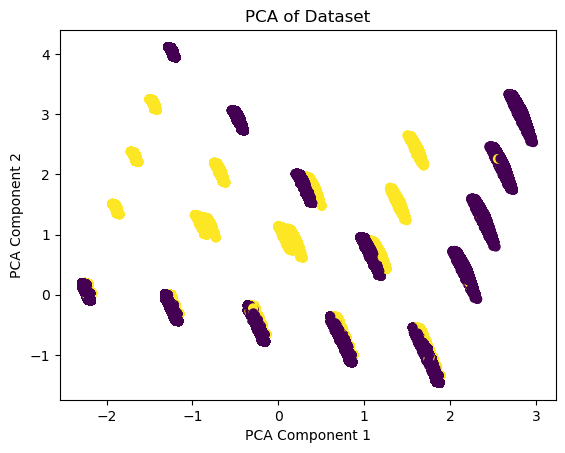

In [30]:
# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Dataset')
plt.show()

In [ ]:
# doesn't seem to be linearly seperable tbh

### MLP with K-fold

In [ ]:
# data is shuffled in preprocessing to ensure even k-folds

# choose 5 or 3, as don't have all the resources for more

In [2]:
import numpy as np
from tensorflow.keras import layers, optimizers, models
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

# Define parameters
learning_rate = 5e-4
n_splits = 3  # Number of folds

# Function to build the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Convert data to float32 (required by TensorFlow)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Set up K-Fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1

# Lists to store results
conf_matrices_mlp = []
classification_reports_mlp = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    print(f"\nFold {fold}")
    
    # Split data into training and testing for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Build and train the model
    model = build_model()
    model.fit(X_train, y_train, epochs=7, batch_size=32, verbose=1)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class predictions
    
    # Calculate confusion matrix and classification report
    cm_mlp = confusion_matrix(y_test, y_pred)
    report_mlp = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    conf_matrices_mlp.append(cm_mlp)
    classification_reports_mlp.append(report_mlp)
    
    # Print results for the current fold
    print("Confusion Matrix:")
    print(cm_mlp)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    fold += 1

# Optional: Calculate and print average metrics across all folds if needed



Fold 1


c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - accuracy: 0.6342 - loss: 0.6103
Epoch 2/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - accuracy: 0.6581 - loss: 0.5825
Epoch 3/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.6620 - loss: 0.5778
Epoch 4/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - accuracy: 0.6636 - loss: 0.5758
Epoch 5/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - accuracy: 0.6654 - loss: 0.5748
Epoch 6/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - accuracy: 0.6643 - loss: 0.5788
Epoch 7/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.6652 - loss: 0.5755
26042/26042 ━━━━━━━━━━━━━━━━━━━━ 22s 853us/step
Confusion Matrix:
[[325214  91424]
 [181612 235084]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70    416638
         1.0       0.72      0.56      0.63    416696

    accuracy                           0.67    833334
   macro avg       0.68    

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.6342 - loss: 0.6093
Epoch 2/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step - accuracy: 0.6573 - loss: 0.5819
Epoch 3/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step - accuracy: 0.6609 - loss: 0.5783
Epoch 4/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - accuracy: 0.6621 - loss: 0.5773
Epoch 5/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - accuracy: 0.6635 - loss: 0.5761
Epoch 6/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 66s 1ms/step - accuracy: 0.6653 - loss: 0.5748
Epoch 7/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step - accuracy: 0.6658 - loss: 0.5738
26042/26042 ━━━━━━━━━━━━━━━━━━━━ 21s 812us/step
Confusion Matrix:
[[326118  90670]
 [181914 234631]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.71    416788
         1.0       0.72      0.56      0.63    416545

    accuracy                           0.67    833333
   macro avg       0.68      0.67    

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.6337 - loss: 0.6091
Epoch 2/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.6591 - loss: 0.5809
Epoch 3/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.6624 - loss: 0.5777
Epoch 4/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.6642 - loss: 0.5762
Epoch 5/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - accuracy: 0.6656 - loss: 0.5749
Epoch 6/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.6659 - loss: 0.5748
Epoch 7/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - accuracy: 0.6660 - loss: 0.5744
26042/26042 ━━━━━━━━━━━━━━━━━━━━ 22s 840us/step
Confusion Matrix:
[[326777  89797]
 [184389 232370]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70    416574
         1.0       0.72      0.56      0.63    416759

    accuracy                           0.67    833333
   macro avg       0.68      0.67    

In [22]:
# Calculate average accuracy
accuracies_mlp = [report_mlp['accuracy'] for report_mlp in classification_reports_mlp]
average_accuracy_mlp = np.mean(accuracies_mlp)
print(f"\nAverage Accuracy: {average_accuracy_mlp}")

# Caluculate average standard deviation
std_dev_mlp= np.std(accuracies_mlp)
print(f"Standard Deviation: {std_dev_mlp}")


Average Accuracy: 0.672077599888215
Standard Deviation: 0.000809312684114176


In [23]:
import numpy as np

# Collect the recall for the '1.0' class from each fold
recall_class_1 = [report_mlp['1.0']['recall'] for report_mlp in classification_reports_mlp]

# Calculate the average recall for the '1.0' class across all folds
average_recall_class_1 = np.mean(recall_class_1)
print(f"\nAverage Recall for class 1.0: {average_recall_class_1}")



Average Recall for class 1.0: 0.5616684013849729
